# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pingouin

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/My Drive/hri

/content/drive/My Drive/hri


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro
from scipy.stats import ttest_ind
import pingouin as pg
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import linregress, ttest_1samp

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q66,Q67,Q68,Q34,Q35,Q36,Q37,Q38,Q3,Q4
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Authentic,Meticulous,Has integrity,The robot’s voice influenced how I interpreted...,The robot’s voice made it feel more humanlike.,I felt more socially engaged because of the ro...,I found the robot’s voice soothing.,I found the robot’s voice suspicious or off-pu...,The condition for the survey,Participant ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID66""}","{""ImportId"":""QID67""}","{""ImportId"":""QID68""}","{""ImportId"":""QID27""}","{""ImportId"":""QID28""}","{""ImportId"":""QID29""}","{""ImportId"":""QID30""}","{""ImportId"":""QID31""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33_TEXT""}"
2,12/05/2025 14:56,12/05/2025 15:08,0,128.135.204.106,100,664,1,12/05/2025 15:08,R_7C8Bo7xmyZgcOfg,NaN,...,3,6,4,5,2,6,3,2,2,1001
3,12/05/2025 15:16,12/05/2025 15:23,0,128.135.204.106,100,435,1,12/05/2025 15:23,R_5NQw1MxOilFcGjz,NaN,...,5,6,5,2,6,6,6,2,1,1002
4,12/05/2025 16:13,12/05/2025 16:22,0,128.135.204.106,100,537,1,12/05/2025 16:22,R_3IbJdQm22aZUJFF,NaN,...,2,2,2,6,3,6,2,7,1,1004


# Data Preprocessing

In [ ]:
# Use the first row (index 0) as header
new_header = df.iloc[0]
 # Remove first two rows (0 and 1)
df = df[2:]
# Assign new header
df.columns = new_header

# Drop the third original row, which is now the first row of df
#df = df.drop(index=df.index[0]).reset_index(drop=True)

In [ ]:
df.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Authentic,Meticulous,Has integrity,The robot’s voice influenced how I interpreted its intentions.,The robot’s voice made it feel more humanlike.,I felt more socially engaged because of the robot’s voice.,I found the robot’s voice soothing.,I found the robot’s voice suspicious or off-putting.,The condition for the survey,Participant ID
2,12/05/2025 14:56,12/05/2025 15:08,0,128.135.204.106,100,664,1,12/05/2025 15:08,R_7C8Bo7xmyZgcOfg,NaN,...,3,6,4,5,2,6,3,2,2,1001
3,12/05/2025 15:16,12/05/2025 15:23,0,128.135.204.106,100,435,1,12/05/2025 15:23,R_5NQw1MxOilFcGjz,NaN,...,5,6,5,2,6,6,6,2,1,1002
4,12/05/2025 16:13,12/05/2025 16:22,0,128.135.204.106,100,537,1,12/05/2025 16:22,R_3IbJdQm22aZUJFF,NaN,...,2,2,2,6,3,6,2,7,1,1004
5,13/05/2025 12:35,13/05/2025 12:48,0,128.135.204.106,100,796,1,13/05/2025 12:48,R_58ce96LZoZdgUHn,NaN,...,4,4,3,1,1,1,1,1,2,1005
6,13/05/2025 13:26,13/05/2025 13:36,0,12.74.213.75,100,596,1,13/05/2025 13:36,R_34cIfo8Npm7ODf5,NaN,...,6,5,6,4,5,5,4,4,1,1006


In [ ]:
# Ensure Participant ID is numeric
df["Participant_ID"] = pd.to_numeric(df["Participant ID"], errors="coerce")

# Sort by Participant ID
df = df.sort_values(by="Participant_ID").reset_index(drop=True)
# Assign participant ID starting from 1
df["Participant_ID"] = range(1, len(df) + 1)

In [ ]:
df.columns

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language',
       'I trusted the robot's bids in the 1st round.',
       'I trusted the robot's bids in the 2nd round.',
       'I trusted the robot's bids in the 3rd round.',
       'I trusted the robot's bids in the 4th round.',
       'I trusted the robot's bids in the 5th round.',
       'I trusted the robot's bids in the 6th round.',
       'I suspected the robot was bluffing.',
       'I fell for the robot's misleading behavior at least once.',
       'I adjusted my strategy based on how honest I thought the robot was.',
       'The robot behaved honestly during the game.',
       'What do you think the robot's gender is?',
       'If you chose ot

In [ ]:
df = df.drop(columns=['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language','Participant ID'])

In [ ]:
df = df.rename(columns={
    "What do you think the robot's gender is?": "voice_gender_guess",
    "The condition for the survey": "voice_condition",
    "What is your age?": "age",
    "What is your gender?": "participant_gender",
    "What is your ethnicity?": "ethnicity",
    "Have you played Texas Hold'em before?": "has_played_poker",
    "If yes, how experienced do you think you are?": "poker_experience",
    "Would you like to receive study results if they are published?": "wants_results",
    "I felt engaged with the robot.": "felt_engaged",
    "The robot's behavior made me second-guess myself.": "second_guessing",
    "I experienced emotional reactions to the robot's moves.": "emotional_reactions",
    "I was confident in my decisions.": "decision_confidence",
    "I felt anxious or tense during some rounds.": "felt_anxious",
    "I felt the robot was challenging me intentionally.": "felt_challenged",
    "The robot’s voice influenced how I interpreted its intentions.": "voice_influenced_intention",
    "The robot’s voice made it feel more humanlike.": "voice_felt_humanlike",
    "I felt more socially engaged because of the robot’s voice.": "voice_social_engagement",
    "I found the robot’s voice soothing.": "voice_soothing",
    "I found the robot’s voice suspicious or off-putting.": "voice_suspicious",
    "I trusted the robot's bids in the 1st round.": "trust_round_1",
    "I trusted the robot's bids in the 2nd round.": "trust_round_2",
    "I trusted the robot's bids in the 3rd round.": "trust_round_3",
    "I trusted the robot's bids in the 4th round.": "trust_round_4",
    "I trusted the robot's bids in the 5th round.": "trust_round_5",
    "I trusted the robot's bids in the 6th round.": "trust_round_6",
    "I suspected the robot was bluffing.": "suspected_bluffing",
    "I fell for the robot's misleading behavior at least once.": "fell_for_bluff",
    "I adjusted my strategy based on how honest I thought the robot was.": "adjusted_strategy_for_honesty",
    "The robot behaved honestly during the game.": "perceived_robot_honesty",
    "Reliable": "trait_reliable",
    "Sincere": "trait_sincere",
    "Capable": "trait_capable",
    "Ethical": "trait_ethical",
    "Predictable": "trait_predictable",
    "Genuine": "trait_genuine",
    "Skilled": "trait_skilled",
    "Respectable": "trait_respectable",
    "Someone you can count on": "trait_dependent",
    "Candid": "trait_candid",
    "Competent": "trait_competent",
    "Principled": "trait_principled",
    "Consistent": "trait_consistent",
    "Authentic": "trait_authentic",
    "Meticulous": "trait_meticulous",
    "Has integrity": "trait_integrity"
})

In [ ]:
df.head()

,trust_round_1,trust_round_2,trust_round_3,trust_round_4,trust_round_5,trust_round_6,suspected_bluffing,fell_for_bluff,adjusted_strategy_for_honesty,perceived_robot_honesty,...,trait_authentic,trait_meticulous,trait_integrity,voice_influenced_intention,voice_felt_humanlike,voice_social_engagement,voice_soothing,voice_suspicious,voice_condition,Participant_ID
0,6,2,6,6,6,6,5,5,2,5,...,3,6,4,5,2,6,3,2,2,1
1,2,5,4,2,2,2,6,6,2,2,...,5,6,5,2,6,6,6,2,1,2
2,5,5,5,6,4,5,3,6,5,6,...,6,6,6,5,6,6,5,6,1,3
3,2,2,5,2,2,2,4,5,2,1,...,2,2,2,6,3,6,2,7,1,4
4,1,1,1,7,4,4,4,3,1,6,...,4,4,3,1,1,1,1,1,2,5


In [ ]:
df.columns

Index(['trust_round_1', 'trust_round_2', 'trust_round_3', 'trust_round_4',
       'trust_round_5', 'trust_round_6', 'suspected_bluffing',
       'fell_for_bluff', 'adjusted_strategy_for_honesty',
       'perceived_robot_honesty', 'voice_gender_guess',
       'If you chose other in the question above, please elaborate.', 'age',
       'participant_gender', 'ethnicity', 'has_played_poker',
       'poker_experience', 'wants_results', 'felt_engaged', 'second_guessing',
       'emotional_reactions', 'decision_confidence', 'felt_anxious',
       'felt_challenged', 'trait_reliable', 'trait_sincere', 'trait_capable',
       'trait_ethical', 'trait_predictable', 'trait_genuine', 'trait_skilled',
       'trait_respectable', 'trait_dependent', 'trait_candid',
       'trait_competent', 'trait_principled', 'trait_consistent',
       'trait_authentic', 'trait_meticulous', 'trait_integrity',
       'voice_influenced_intention', 'voice_felt_humanlike',
       'voice_social_engagement', 'voice_soothing

# Statistical Testing

## Voice Gender Influence
### RQ1. How does the robot’s voice gender affect participants’ perceptions, trust, and decision strategies?

### Mainupulation Check

In [ ]:
print(df["voice_gender_guess"].unique())

['4' '3' '1' '2']


In [ ]:
print(df["voice_condition"].unique())

['2' '1']


In [ ]:
# Convert both columns to string to compare directly
df["voice_condition"] = df["voice_condition"].astype(str)
df["voice_gender_guess"] = df["voice_gender_guess"].astype(str)

# Flag participants who guessed the correct voice gender
# In voice condition, 1 = female, 2 = male
# In voice gender guess, 1 = male, 2 = female, 3 = neither, 4 = other
# Apply corrected logic: voice_condition 1 = female → guess should be 2; voice_condition 2 = male → guess should be 1
df["manip_check_passed"] = (
    ((df["voice_condition"] == '1') & (df["voice_gender_guess"] == '2')) |
    ((df["voice_condition"] == '2') & (df["voice_gender_guess"] == '1'))
)

# Print results
print("Manipulation check results:")
print(df["manip_check_passed"].value_counts(dropna=False))

# Show who failed
print("\n❌ Participants who failed the manipulation check:")
print(df.loc[df["manip_check_passed"] == False, ["Participant_ID", "voice_condition", "voice_gender_guess"]])


Manipulation check results:
manip_check_passed
False    10
True     10
Name: count, dtype: int64

❌ Participants who failed the manipulation check:
0   Participant_ID voice_condition voice_gender_guess
0                1               2                  4
1                2               1                  3
2                3               1                  1
5                6               1                  1
7                8               2                  3
11              12               1                  1
14              15               2                  3
15              16               1                  3
17              18               1                  3
18              19               2                  3


### RQ1.1 Does the robot’s voice gender influence perceived warmth and competence?


In [ ]:
# Define RoSAS-based scales

# Warmth items (RoSAS typically includes traits like these)
warmth_items = [
    'trait_sincere',
    'trait_ethical',
    'trait_genuine',
    'trait_respectable',
    'trait_candid',
    'trait_principled',
    'trait_authentic',
    'trait_integrity',
    'trait_dependent'  # interpreted from "someone you can count on"
]

# Competence items
competence_items = [
    'trait_capable',
    'trait_skilled',
    'trait_competent',
    'trait_meticulous',
    'trait_predictable',
    'trait_consistent'
]

In [ ]:
# Compute average scores per participant
df["warmth_score"] = df[warmth_items].astype(float).mean(axis=1)
df["competence_score"] = df[competence_items].astype(float).mean(axis=1)

In [ ]:
df_all = df.copy()
df_all["voice_gender"] = df_all["voice_condition"].map({"1": "female", "2": "male"})

# Group scores
wm_all = df_all[df_all["voice_gender"] == "male"]
wf_all = df_all[df_all["voice_gender"] == "female"]

df_passed = df_all[df_all["manip_check_passed"] == True].copy()

wm_passed = df_pass[df_pass["voice_gender"] == "male"]
wf_passed = df_pass[df_pass["voice_gender"] == "female"]


# T-tests
print("T-TEST (All Participants)")
print("Warmth:", ttest_ind(wm_all["warmth_score"], wf_all["warmth_score"], equal_var=True))
print("Competence:", ttest_ind(wm_all["competence_score"], wf_all["competence_score"], equal_var=True))

# Effect size
print("Effect Size - Warmth:", pg.compute_effsize(wm_all["warmth_score"], wf_all["warmth_score"], eftype='cohen'))
print("Effect Size - Competence:", pg.compute_effsize(wm_all["competence_score"], wf_all["competence_score"], eftype='cohen'))


T-TEST (All Participants)
Warmth: TtestResult(statistic=np.float64(-0.1459795928075809), pvalue=np.float64(0.8855598856234357), df=np.float64(18.0))
Competence: TtestResult(statistic=np.float64(-0.22785421993394522), pvalue=np.float64(0.822327779607411), df=np.float64(18.0))
Effect Size - Warmth: -0.06561294759554075
Effect Size - Competence: -0.10241285582742345


In [ ]:
# Run t-tests
print("\n T-TEST (Passed Participants Only)")
t_warmth = ttest_ind(wm_pass["warmth_score"], wf_pass["warmth_score"], equal_var=True)
t_competence = ttest_ind(wm_pass["competence_score"], wf_pass["competence_score"], equal_var=True)

print("Warmth:", t_warmth)
print("Competence:", t_competence)

# Effect sizes
d_warmth = pg.compute_effsize(wm_pass["warmth_score"], wf_pass["warmth_score"], eftype='cohen')
d_competence = pg.compute_effsize(wm_pass["competence_score"], wf_pass["competence_score"], eftype='cohen')

print("\nEffect Sizes:")
print("Warmth:", d_warmth)
print("Competence:", d_competence)


 T-TEST (Passed Participants Only)
Warmth: TtestResult(statistic=np.float64(0.8714318905579171), pvalue=np.float64(0.40890741384829776), df=np.float64(8.0))
Competence: TtestResult(statistic=np.float64(0.8808303292720536), pvalue=np.float64(0.4040945994758529), df=np.float64(8.0))

Effect Sizes:
Warmth: 0.5511419199739195
Competence: 0.5570860145311546


### RQ1.2 Does voice gender affect reported trust in the robot?

In [ ]:
# Define trust items
trust_items = [
    "trust_round_1", "trust_round_2", "trust_round_3",
    "trust_round_4", "trust_round_5", "trust_round_6"
]

# Convert to numeric
df[trust_items] = df[trust_items].apply(pd.to_numeric, errors="coerce")

# Compute average trust score
df["trust_score"] = df[trust_items].mean(axis=1)

In [ ]:
# --- Run for ALL participants ---
df_all["trust_score"] = df["trust_score"]
wm_all = df_all[df_all["voice_gender"] == "male"]
wf_all = df_all[df_all["voice_gender"] == "female"]

print("\n T-TEST (All Participants - Trust Score)")
print("Means: Male =", wm_all["trust_score"].mean(), " | Female =", wf_all["trust_score"].mean())
print("T-test:", ttest_ind(wm_all["trust_score"], wf_all["trust_score"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_all["trust_score"], wf_all["trust_score"], eftype='cohen'))



 T-TEST (All Participants - Trust Score)
Means: Male = 3.2407407407407405  | Female = 3.3787878787878785
T-test: TtestResult(statistic=np.float64(-0.26201366909132356), pvalue=np.float64(0.7962858372343686), df=np.float64(18.0))
Effect size: -0.11776638644323985


In [ ]:
# --- Run for PASSED participants only ---
df_passed["trust_score"] = df.loc[df_passed.index, "trust_score"]
wm_pass = df_passed[df_passed["voice_gender"] == "male"]
wf_pass = df_passed[df_passed["voice_gender"] == "female"]

print("\n T-TEST (Passed Participants Only - Trust Score)")
print("Means: Male =", wm_pass["trust_score"].mean(), " | Female =", wf_pass["trust_score"].mean())
print("T-test:", ttest_ind(wm_pass["trust_score"], wf_pass["trust_score"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_pass["trust_score"], wf_pass["trust_score"], eftype='cohen'))


 T-TEST (Passed Participants Only - Trust Score)
Means: Male = 3.366666666666667  | Female = 3.1666666666666665
T-test: TtestResult(statistic=np.float64(0.27944785969957425), pvalue=np.float64(0.7869898747897255), df=np.float64(8.0))
Effect size: 0.17673834478196623


### Does voice gender affect aggressiveness in decision-making?

In [ ]:
ls

analysis.ipynb  data.csv  results/


In [ ]:
# Set your local folder path to the result directory
json_folder = 'results/'  # Make sure this folder exists and contains the .json files

# Step 1: Collect and sort all .json files by timestamp
json_files = sorted(
    [f for f in os.listdir(json_folder) if f.endswith('.json')],
    key=lambda x: x.replace(".json", "")
)

# Step 2: Map each filename to a participant ID (sorted order = consistent mapping)
file_id_map = {filename.replace(".json", ""): idx + 1 for idx, filename in enumerate(json_files)}

# Step 3: Extract round-level and game-level data
records = []
summary_stats = []

for filename in json_files:
    with open(os.path.join(json_folder, filename), 'r') as f:
        data = json.load(f)
        pid = file_id_map[filename.replace(".json", "")]

        # Add game-level stats
        stats = data.get("stats", {})
        summary_stats.append({
            "participant_id": pid,
            "player_wins": stats.get("player_wins", None),
            "robot_wins": stats.get("robot_wins", None),
            "ties": stats.get("ties", None),
            "bluff_count": stats.get("bluff_count", None),
            "player_detected_bluffs": stats.get("player_detected_bluffs", None),
            "avg_player_bet": stats.get("avg_player_bet", None),
            "avg_robot_bet": stats.get("avg_robot_bet", None),
            "male_voice_rounds": stats.get("male_voice_rounds", None),
            "female_voice_rounds": stats.get("female_voice_rounds", None)
        })

        # Add round-level data
        for round_info in data.get("round_data", []):
            records.append({
                "participant_id": pid,
                "round_num": round_info.get("round_num"),
                "predetermined_outcome": round_info.get("predetermined_outcome"),
                "robot_bluffed": round_info.get("robot_bluffed"),
                "player_folded": round_info.get("player_folded", False),
                "player_bet_amount": round_info.get("player_bet_amount"),
                "robot_bet_amount": round_info.get("robot_bet_amount"),
                "robot_voice_gender": round_info.get("robot_voice_gender"),
                "player_detected_bluff": round_info.get("player_detected_bluff"),
                "actual_outcome": round_info.get("actual_outcome")
            })


In [ ]:
# Create DataFrame
df_game = pd.DataFrame(records)
df_summary = pd.DataFrame(summary_stats)


In [ ]:
df_game

,participant_id,round_num,predetermined_outcome,robot_bluffed,player_folded,player_bet_amount,robot_bet_amount,robot_voice_gender,player_detected_bluff,actual_outcome
0,1,1,PLAYER_WINS,False,False,2,2,male,False,PLAYER_WINS
1,1,2,ROBOT_WINS,True,True,0,0,male,False,ROBOT_WINS
2,1,3,TIE,True,False,1,1,male,False,TIE
3,1,4,TIE,True,True,0,0,male,False,ROBOT_WINS
4,1,5,ROBOT_WINS,False,False,3,3,male,False,ROBOT_WINS
...,...,...,...,...,...,...,...,...,...,...
115,20,2,ROBOT_WINS,True,False,1,1,female,False,ROBOT_WINS
116,20,3,ROBOT_WINS,True,True,0,0,female,False,ROBOT_WINS
117,20,4,TIE,True,False,1,1,female,False,TIE
118,20,5,TIE,True,False,0,0,female,False,TIE


In [ ]:
df_summary.head()

,participant_id,player_wins,robot_wins,ties,bluff_count,player_detected_bluffs,avg_player_bet,avg_robot_bet,male_voice_rounds,female_voice_rounds
0,1,2,3,1,3,0,1.166667,1.166667,6,0
1,2,2,3,1,3,1,1.333333,1.333333,0,6
2,3,2,2,2,2,1,1.666667,2.000000,6,0
3,4,2,2,2,3,2,1.500000,1.500000,0,6
4,5,2,2,2,2,1,2.166667,2.166667,6,0


In [ ]:
# Get unique participant_ids sorted by timestamp
unique_ids = sorted(df_game["participant_id"].unique())

# Create mapping from filename → numeric ID
id_map = {pid: idx + 1 for idx, pid in enumerate(unique_ids)}

# Replace string IDs with numeric ones
df_game["participant_id"] = df_game["participant_id"].map(id_map)

In [ ]:
df_game

,participant_id,round_num,predetermined_outcome,robot_bluffed,player_folded,player_bet_amount,robot_bet_amount,robot_voice_gender,player_detected_bluff
0,1,1,PLAYER_WINS,False,False,2,2,male,False
1,1,2,ROBOT_WINS,True,True,0,0,male,False
2,1,3,TIE,True,False,1,1,male,False
3,1,4,TIE,True,True,0,0,male,False
4,1,5,ROBOT_WINS,False,False,3,3,male,False
...,...,...,...,...,...,...,...,...,...
115,20,2,ROBOT_WINS,True,False,1,1,female,False
116,20,3,ROBOT_WINS,True,True,0,0,female,False
117,20,4,TIE,True,False,1,1,female,False
118,20,5,TIE,True,False,0,0,female,False


In [ ]:

# Calculate aggression per round: betting > 0 and not folded
df_game["aggressive_action"] = (df_game["player_bet_amount"] > 0) & (~df_game["player_folded"])

# Aggregate metrics per participant
agg_df = df_game.groupby(["participant_id", "robot_voice_gender"]).agg(
    avg_bet=("player_bet_amount", "mean"),
    aggression_rate=("aggressive_action", "mean")
).reset_index()

# Show result
print(agg_df)

    participant_id robot_voice_gender   avg_bet  aggression_rate
0                1               male  1.166667         0.666667
1                2             female  1.333333         0.666667
2                3               male  1.666667         0.833333
3                4             female  1.500000         0.833333
4                5               male  2.166667         0.833333
5                6             female  1.666667         1.000000
6                7               male  0.500000         0.333333
7                8               male  1.666667         0.833333
8                9             female  1.166667         0.500000
9               10             female  1.333333         0.666667
10              11               male  1.000000         0.333333
11              12             female  1.166667         0.833333
12              13               male  2.166667         0.833333
13              14             female  0.833333         0.500000
14              15       

In [ ]:
# --- Run for ALL participants ---
df_all["aggression_rate"] = agg_df["aggression_rate"]
wm_all = df_all[df_all["voice_gender"] == "male"]
wf_all = df_all[df_all["voice_gender"] == "female"]

print("\n T-TEST (All Participants - Aggression Rate)")
print("Means: Male =", wm_all["aggression_rate"].mean(), " | Female =", wf_all["aggression_rate"].mean())
print("T-test:", ttest_ind(wm_all["aggression_rate"], wf_all["aggression_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_all["aggression_rate"], wf_all["aggression_rate"], eftype='cohen'))


 T-TEST (All Participants - Aggression Rate)
Means: Male = 0.6111111111111112  | Female = 0.696969696969697
T-test: TtestResult(statistic=np.float64(-0.9603855608722545), pvalue=np.float64(0.3495854337375258), df=np.float64(18.0))
Effect size: -0.4316612087011717


In [ ]:
# --- Run for PASSED participants only ---
df_passed["aggression_rate"] = agg_df.loc[df_passed.index, "aggression_rate"]
wm_pass = df_passed[df_passed["voice_gender"] == "male"]
wf_pass = df_passed[df_passed["voice_gender"] == "female"]

print("\n T-TEST (Passed Participants Only - Aggression Rate)")
print("Means: Male =", wm_pass["aggression_rate"].mean(), " | Female =", wf_pass["aggression_rate"].mean())
print("T-test:", ttest_ind(wm_pass["aggression_rate"], wf_pass["aggression_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_pass["aggression_rate"], wf_pass["aggression_rate"], eftype='cohen'))


 T-TEST (Passed Participants Only - Aggression Rate)
Means: Male = 0.6  | Female = 0.6
T-test: TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(8.0))
Effect size: 0.0


### Does voice gender influence how participants make decisions under uncertainty?


In [ ]:
# Label uncertainty-prone actions (Fold or Check)
df_game["uncertain_action"] = (df_game["player_folded"]) | (df_game["player_bet_amount"] == 0)

# Aggregate uncertainty rate per participant
uncertainty_df = df_game.groupby(["participant_id", "robot_voice_gender"]).agg(
    uncertainty_rate=("uncertain_action", "mean")
).reset_index()

# Merge with survey data
uncertainty_df["Participant_ID"] = uncertainty_df["participant_id"]
df_all["uncertainty_rate"] = df_all["Participant_ID"].map(
    dict(zip(uncertainty_df["Participant_ID"], uncertainty_df["uncertainty_rate"]))
)


In [ ]:
df_all.head()

,trust_round_1,trust_round_2,trust_round_3,trust_round_4,trust_round_5,trust_round_6,suspected_bluffing,fell_for_bluff,adjusted_strategy_for_honesty,perceived_robot_honesty,...,voice_suspicious,voice_condition,Participant_ID,manip_check_passed,warmth_score,competence_score,trust_score,voice_gender,aggression_rate,uncertainty_rate
0,6,2,6,6,6,6,5,5,2,5,...,2,2,1,False,3.777778,4.833333,5.333333,male,0.666667,0.333333
1,2,5,4,2,2,2,6,6,2,2,...,2,1,2,False,4.666667,4.833333,2.833333,female,0.666667,0.333333
2,5,5,5,6,4,5,3,6,5,6,...,6,1,3,False,6.111111,5.833333,5.000000,female,0.833333,0.166667
3,2,2,5,2,2,2,4,5,2,1,...,7,1,4,True,1.888889,2.666667,2.500000,female,0.833333,0.166667
4,1,1,1,7,4,4,4,3,1,6,...,1,2,5,True,3.888889,3.166667,3.000000,male,0.833333,0.166667


In [ ]:
uncertainty_df.head()

,participant_id,robot_voice_gender,uncertainty_rate,Participant_ID
0,1,male,0.333333,1
1,2,female,0.333333,2
2,3,male,0.166667,3
3,4,female,0.166667,4
4,5,male,0.166667,5


In [ ]:
# Split into male/female voice groups
wm_all = df_all[df_all["voice_gender"] == "male"]
wf_all = df_all[df_all["voice_gender"] == "female"]

In [ ]:
wm_all.head()

,trust_round_1,trust_round_2,trust_round_3,trust_round_4,trust_round_5,trust_round_6,suspected_bluffing,fell_for_bluff,adjusted_strategy_for_honesty,perceived_robot_honesty,...,voice_suspicious,voice_condition,Participant_ID,manip_check_passed,warmth_score,competence_score,trust_score,voice_gender,aggression_rate,uncertainty_rate
0,6,2,6,6,6,6,5,5,2,5,...,2,2,1,False,3.777778,4.833333,5.333333,male,0.666667,0.333333
4,1,1,1,7,4,4,4,3,1,6,...,1,2,5,True,3.888889,3.166667,3.000000,male,0.833333,0.166667
6,5,4,6,4,6,6,6,3,5,3,...,2,2,7,True,4.666667,4.833333,5.166667,male,0.333333,0.666667
7,1,1,1,2,1,1,2,5,2,6,...,4,2,8,False,5.111111,3.833333,1.166667,male,0.833333,0.166667
10,4,3,3,3,2,1,6,6,6,2,...,3,2,11,True,4.000000,5.500000,2.666667,male,0.333333,0.666667


In [ ]:
# Run t-test
print("\n T-TEST (All Participants - Uncertainty Rate)")
print("Means: Male =", wm_all["uncertainty_rate"].mean(), " | Female =", wf_all["uncertainty_rate"].mean())
print("T-test:", ttest_ind(wm_all["uncertainty_rate"], wf_all["uncertainty_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_all["uncertainty_rate"], wf_all["uncertainty_rate"], eftype='cohen'))



 T-TEST (All Participants - Uncertainty Rate)
Means: Male = 0.3888888888888889  | Female = 0.303030303030303
T-test: TtestResult(statistic=np.float64(0.9603855608722551), pvalue=np.float64(0.3495854337375256), df=np.float64(18.0))
Effect size: 0.43166120870117203


In [ ]:
# Step 1: Add uncertainty_rate to df_passed from uncertainty_df
df_passed["uncertainty_rate"] = df_passed["Participant_ID"].map(
    dict(zip(uncertainty_df["Participant_ID"], uncertainty_df["uncertainty_rate"]))
)

# Step 2: Split by voice gender
wm_pass = df_passed[df_passed["voice_gender"] == "male"]
wf_pass = df_passed[df_passed["voice_gender"] == "female"]

# Step 3: T-test
print("\n T-TEST (Passed Participants Only - Uncertainty Rate)")
print("Means: Male =", wm_pass["uncertainty_rate"].mean(), " | Female =", wf_pass["uncertainty_rate"].mean())
print("T-test:", ttest_ind(wm_pass["uncertainty_rate"], wf_pass["uncertainty_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_pass["uncertainty_rate"], wf_pass["uncertainty_rate"], eftype='cohen'))


 T-TEST (Passed Participants Only - Uncertainty Rate)
Means: Male = 0.4  | Female = 0.4
T-test: TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(8.0))
Effect size: 0.0


### RQ1.5. Does voice gender affect bluff detection?


In [ ]:
# --- Calculate deception: robot bluffed and player did not detect it ---
df_game["deceived"] = df_game["robot_bluffed"] & (~df_game["player_detected_bluff"])

# --- Aggregate deception rate per participant per robot gender ---
deception_df = df_game.groupby(["participant_id", "robot_voice_gender"]).agg(
    deception_rate=("deceived", "mean")
).reset_index()

# --- Run for ALL participants ---
df_all["deception_rate"] = deception_df["deception_rate"]
wm_all = df_all[df_all["voice_gender"] == "male"]
wf_all = df_all[df_all["voice_gender"] == "female"]

print("\n T-TEST (All Participants - Deception Rate)")
print("Means: Male =", wm_all["deception_rate"].mean(), " | Female =", wf_all["deception_rate"].mean())
print("T-test:", ttest_ind(wm_all["deception_rate"], wf_all["deception_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_all["deception_rate"], wf_all["deception_rate"], eftype='cohen'))

# --- Run for PASSED participants only ---
df_passed["deception_rate"] = deception_df.loc[df_passed.index, "deception_rate"]
wm_pass = df_passed[df_passed["voice_gender"] == "male"]
wf_pass = df_passed[df_passed["voice_gender"] == "female"]

print("\n T-TEST (Passed Participants Only - Deception Rate)")
print("Means: Male =", wm_pass["deception_rate"].mean(), " | Female =", wf_pass["deception_rate"].mean())
print("T-test:", ttest_ind(wm_pass["deception_rate"], wf_pass["deception_rate"], equal_var=True))
print("Effect size:", pg.compute_effsize(wm_pass["deception_rate"], wf_pass["deception_rate"], eftype='cohen'))



 T-TEST (All Participants - Deception Rate)
Means: Male = 0.33333333333333326  | Female = 0.3333333333333333
T-test: TtestResult(statistic=np.float64(-5.941434598101946e-16), pvalue=np.float64(0.9999999999999996), df=np.float64(18.0))
Effect size: -2.670476259249787e-16

 T-TEST (Passed Participants Only - Deception Rate)
Means: Male = 0.23333333333333334  | Female = 0.4333333333333333
T-test: TtestResult(statistic=np.float64(-1.4142135623730945), pvalue=np.float64(0.19501552810007583), df=np.float64(8.0))
Effect size: -0.8944271909999157


### RQ1.6.Does voice gender influence player's winning rate?

In [ ]:
df_summary.head()

,participant_id,player_wins,robot_wins,ties,bluff_count,player_detected_bluffs,avg_player_bet,avg_robot_bet,male_voice_rounds,female_voice_rounds
0,1,2,3,1,3,0,1.166667,1.166667,6,0
1,2,2,3,1,3,1,1.333333,1.333333,0,6
2,3,2,2,2,2,1,1.666667,2.000000,6,0
3,4,2,2,2,3,2,1.500000,1.500000,0,6
4,5,2,2,2,2,1,2.166667,2.166667,6,0


In [ ]:
df_summary['win_rate'] = df_summary['player_wins'] / 6

In [ ]:
df_summary

,participant_id,player_wins,robot_wins,ties,bluff_count,player_detected_bluffs,avg_player_bet,avg_robot_bet,male_voice_rounds,female_voice_rounds,win_rate
0,1,2,3,1,3,0,1.166667,1.166667,6,0,0.333333
1,2,2,3,1,3,1,1.333333,1.333333,0,6,0.333333
2,3,2,2,2,2,1,1.666667,2.000000,6,0,0.333333
3,4,2,2,2,3,2,1.500000,1.500000,0,6,0.333333
4,5,2,2,2,2,1,2.166667,2.166667,6,0,0.333333
5,6,2,2,2,2,1,1.666667,1.833333,0,6,0.333333
6,7,1,3,2,4,1,0.500000,1.500000,6,0,0.166667
7,8,2,2,2,2,0,1.666667,1.666667,6,0,0.333333
8,9,2,2,2,4,2,1.166667,1.500000,0,6,0.333333
9,10,2,2,2,2,0,1.333333,2.000000,0,6,0.333333


### Summary Table

In [ ]:
gender_columns = ["Measure", "Group", "Male Mean", "Female Mean", "t-stat", "p-value", "Sig", "Cohen's d", "CI Lower", "CI Upper"]

In [ ]:
def create_detailed_result_row(measure, group, wm, wf):
    t_result = pg.ttest(wm, wf)
    t_stat = t_result["T"].values[0]
    p_val = t_result["p-val"].values[0]
    ci_low, ci_high = t_result["CI95%"].values[0]
    d = pg.compute_effsize(wm, wf, eftype='cohen')

    # Significance stars
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    elif p_val < 0.1:
        stars = "+"
    else:
        stars = ""

    return [
        measure, group,
        round(wm.mean(), 2), round(wf.mean(), 2),
        round(t_stat, 2), round(p_val, 3), stars, round(d, 2),
        round(ci_low, 2), round(ci_high, 2)
    ]


In [ ]:
rows = [
    create_detailed_result_row("RQ1.1: Warmth", "All", wm_all["warmth_score"], wf_all["warmth_score"]),
    create_detailed_result_row("RQ1.1: Competence", "All", wm_all["competence_score"], wf_all["competence_score"]),
    create_detailed_result_row("RQ1.1: Warmth", "Passed", wm_pass["warmth_score"], wf_pass["warmth_score"]),
    create_detailed_result_row("RQ1.1: Competence", "Passed", wm_pass["competence_score"], wf_pass["competence_score"]),

    create_detailed_result_row("RQ1.2: Trust", "All", wm_all["trust_score"], wf_all["trust_score"]),
    create_detailed_result_row("RQ1.2: Trust", "Passed", wm_pass["trust_score"], wf_pass["trust_score"]),

    create_detailed_result_row("RQ1.3: Aggression", "All", wm_all["aggression_rate"], wf_all["aggression_rate"]),
    create_detailed_result_row("RQ1.3: Aggression", "Passed", wm_pass["aggression_rate"], wf_pass["aggression_rate"]),

    create_detailed_result_row("RQ1.4: Uncertainty", "All", wm_all["uncertainty_rate"], wf_all["uncertainty_rate"]),
    create_detailed_result_row("RQ1.4: Uncertainty", "Passed", wm_pass["uncertainty_rate"], wf_pass["uncertainty_rate"]),

    create_detailed_result_row("RQ1.5: Deception", "All", wm_all["deception_rate"], wf_all["deception_rate"]),
    create_detailed_result_row("RQ1.5: Deception", "Passed", wm_pass["deception_rate"], wf_pass["deception_rate"])
]

In [ ]:
results_df = pd.DataFrame(rows, columns=gender_columns)

In [ ]:
results_df

,Measure,Group,Male Mean,Female Mean,t-stat,p-value,Sig,Cohen's d,CI Lower,CI Upper
0,RQ1.1: Warmth,All,4.28,4.35,-0.15,0.879,,-0.07,-1.02,0.88
1,RQ1.1: Competence,All,4.56,4.65,-0.24,0.815,,-0.10,-0.95,0.76
2,RQ1.1: Warmth,Passed,4.11,3.58,0.87,0.409,,0.55,-0.88,1.94
3,RQ1.1: Competence,Passed,4.50,4.00,0.88,0.404,,0.56,-0.81,1.81
4,RQ1.2: Trust,All,3.24,3.38,-0.25,0.806,,-0.12,-1.32,1.05
5,RQ1.2: Trust,Passed,3.37,3.17,0.28,0.787,,0.18,-1.45,1.85
6,RQ1.3: Aggression,All,0.61,0.70,-0.94,0.362,,-0.43,-0.28,0.11
7,RQ1.3: Aggression,Passed,0.60,0.60,0.00,1.000,,0.00,-0.30,0.30
8,RQ1.4: Uncertainty,All,0.39,0.30,0.94,0.362,,0.43,-0.11,0.28
9,RQ1.4: Uncertainty,Passed,0.40,0.40,0.00,1.000,,0.00,-0.30,0.30


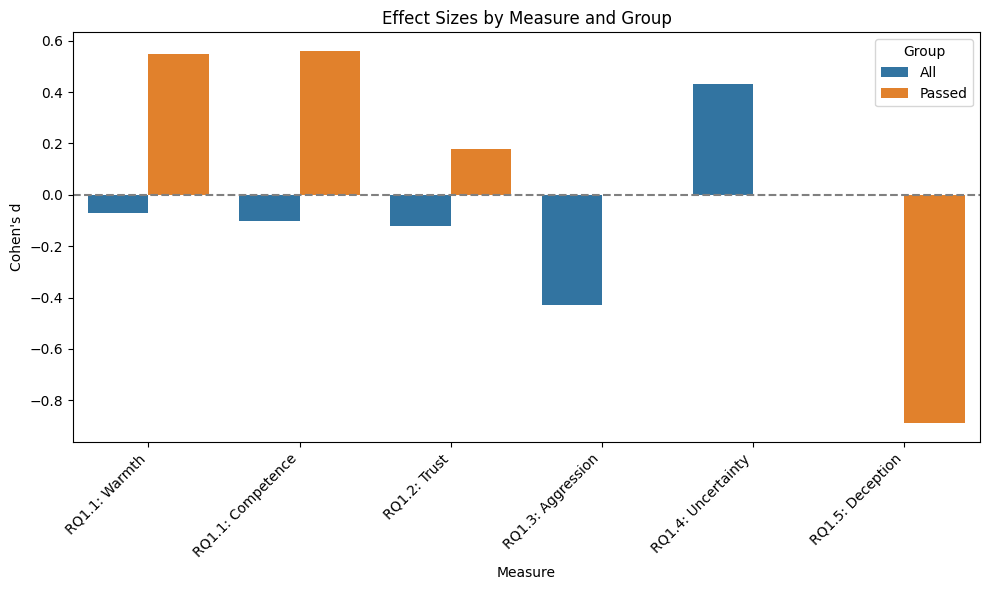

In [ ]:
# Plot: Effect size
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Measure", y="Cohen's d", hue="Group")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Effect Sizes by Measure and Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Adaptive Trust Dynamics: Breach & Repair

### RQ2: How does behavioral trust shift after robot deception, and is there evidence of trust recovery?

### RQ2.1: Do participants show a trust drop after the robot's first bluff?

This is undetermined because there are a lot of edge cases where bluffing happened in the first round, leaving no pre-bluffing data.

In [ ]:
# Step 1: Get first bluff round per participant
first_bluff_df = df_game[df_game["robot_bluffed"] == True].groupby("participant_id")["round_num"].min().reset_index()
first_bluff_df.columns = ["Participant_ID", "first_bluff_round"]


In [ ]:
first_bluff_df

,Participant_ID,first_bluff_round
0,1,2
1,2,1
2,3,3
3,4,1
4,5,2
5,6,2
6,7,1
7,8,1
8,9,1
9,10,3


In [ ]:
# Step 2: Merge with df_all (trust data)
trust_cols = [f"trust_round_{i}" for i in range(1, 7)]
df_trust = df_all[["Participant_ID"] + trust_cols].copy()
merged = pd.merge(df_trust, first_bluff_df, on="Participant_ID", how="inner")


In [ ]:
for col in trust_cols:
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

In [ ]:
# Step 3: Compute before/after trust
def compute_avg_trust(row):
    bluff_round = row["first_bluff_round"]
    before = [row[f"trust_round_{i}"] for i in range(1, bluff_round)]
    after = [row[f"trust_round_{i}"] for i in range(bluff_round + 1, 7)]
    return pd.Series({
        "trust_before": sum(before) / len(before) if before else None,
        "trust_after": sum(after) / len(after) if after else None
    })


In [ ]:
trust_split = merged.apply(compute_avg_trust, axis=1)
merged = pd.concat([merged, trust_split], axis=1)

In [ ]:
# ---- Step 4: Paired t-test ----
paired_df = merged.dropna(subset=["trust_before", "trust_after"])
t_stat, p_val = ttest_rel(paired_df["trust_before"], paired_df["trust_after"])
mean_before = paired_df["trust_before"].mean()
mean_after = paired_df["trust_after"].mean()
n = len(paired_df)

In [ ]:
# ---- Step 5: Print results ----
print("RQ2.1 – Trust Drop After Robot Bluff")
print(f"Participants analyzed: {n}")
print(f"Mean Trust Before Bluff: {mean_before:.2f}")
print(f"Mean Trust After Bluff: {mean_after:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

RQ2.1 – Trust Drop After Robot Bluff
Participants analyzed: 9
Mean Trust Before Bluff: 3.26
Mean Trust After Bluff: 3.44
T-statistic: -0.359
P-value: 0.729


In [ ]:
print(merged[["Participant_ID", "first_bluff_round", "trust_before", "trust_after"]])


    Participant_ID  first_bluff_round  trust_before  trust_after
0                1                  2      6.000000         6.00
1                2                  1           NaN         3.00
2                3                  3      5.000000         5.00
3                4                  1           NaN         2.60
4                5                  2      1.000000         4.00
5                6                  2      2.000000         4.25
6                7                  1           NaN         5.20
7                8                  1           NaN         1.20
8                9                  1           NaN         4.80
9               10                  3      3.000000         2.00
10              11                  4      3.333333         1.50
11              12                  1           NaN         4.00
12              14                  1           NaN         2.00
13              15                  2      5.000000         4.00
14              16       

### RQ2.2: Does trust behavior recover in later rounds?


In [ ]:
# ---- Step 1: Create per-participant slopes after bluff ----
slopes = []

for _, row in merged.iterrows():
    bluff_round = int(row["first_bluff_round"])
    trust_values = []
    round_nums = []

    for r in range(bluff_round, 7):  # Only after bluff
        val = row.get(f"trust_round_{r}")
        if pd.notna(val):
            trust_values.append(val)
            round_nums.append(r)

    if len(trust_values) >= 2:  # Need at least 2 points for a slope
        slope, _, _, _, _ = linregress(round_nums, trust_values)
        slopes.append(slope)

In [ ]:
# ---- Step 2: Analyze the recovery slopes ----

slopes = np.array(slopes)
recovery_t, recovery_p = ttest_1samp(slopes, popmean=0)
mean_slope = slopes.mean()

In [ ]:
print("RQ2.2 – Trust Recovery After Bluff")
print(f"Participants included: {len(slopes)}")
print(f"Mean slope of trust (post-bluff): {mean_slope:.3f}")
print(f"T-test vs 0: t = {recovery_t:.3f}, p = {recovery_p:.3f}")

RQ2.2 – Trust Recovery After Bluff
Participants included: 18
Mean slope of trust (post-bluff): 0.048
T-test vs 0: t = 0.378, p = 0.710


In [ ]:
excluded = []

for _, row in merged.iterrows():
    pid = row["Participant_ID"]
    bluff_round = int(row["first_bluff_round"])
    trust_values = []
    round_nums = []

    for r in range(bluff_round, 7):
        val = row.get(f"trust_round_{r}")
        if pd.notna(val):
            trust_values.append(val)
            round_nums.append(r)

    if len(trust_values) < 2:
        excluded.append((pid, bluff_round, trust_values))

# Show excluded participants and what data they had
for e in excluded:
    print(f"❌ Participant {e[0]} | Bluff Round: {e[1]} | Trust Values Available: {e[2]}")


❌ Participant 16.0 | Bluff Round: 6 | Trust Values Available: [np.float64(3.0)]


In [ ]:
# ---- Bluff map ----
bluff_map = df_game[df_game["robot_bluffed"] == True] \
    .groupby("participant_id")["round_num"].apply(list).to_dict()

# ---- Merge trust scores ----
df_trust = df_all[["Participant_ID"] + trust_cols].copy()
participant_ids = df_trust["Participant_ID"].tolist()


In [ ]:
df_trust

,Participant_ID,trust_round_1,trust_round_2,trust_round_3,trust_round_4,trust_round_5,trust_round_6
0,1,6,2,6,6,6,6
1,2,2,5,4,2,2,2
2,3,5,5,5,6,4,5
3,4,2,2,5,2,2,2
4,5,1,1,1,7,4,4
5,6,2,1,2,7,2,6
6,7,5,4,6,4,6,6
7,8,1,1,1,2,1,1
8,9,5,5,5,5,5,4
9,10,2,4,4,2,2,2


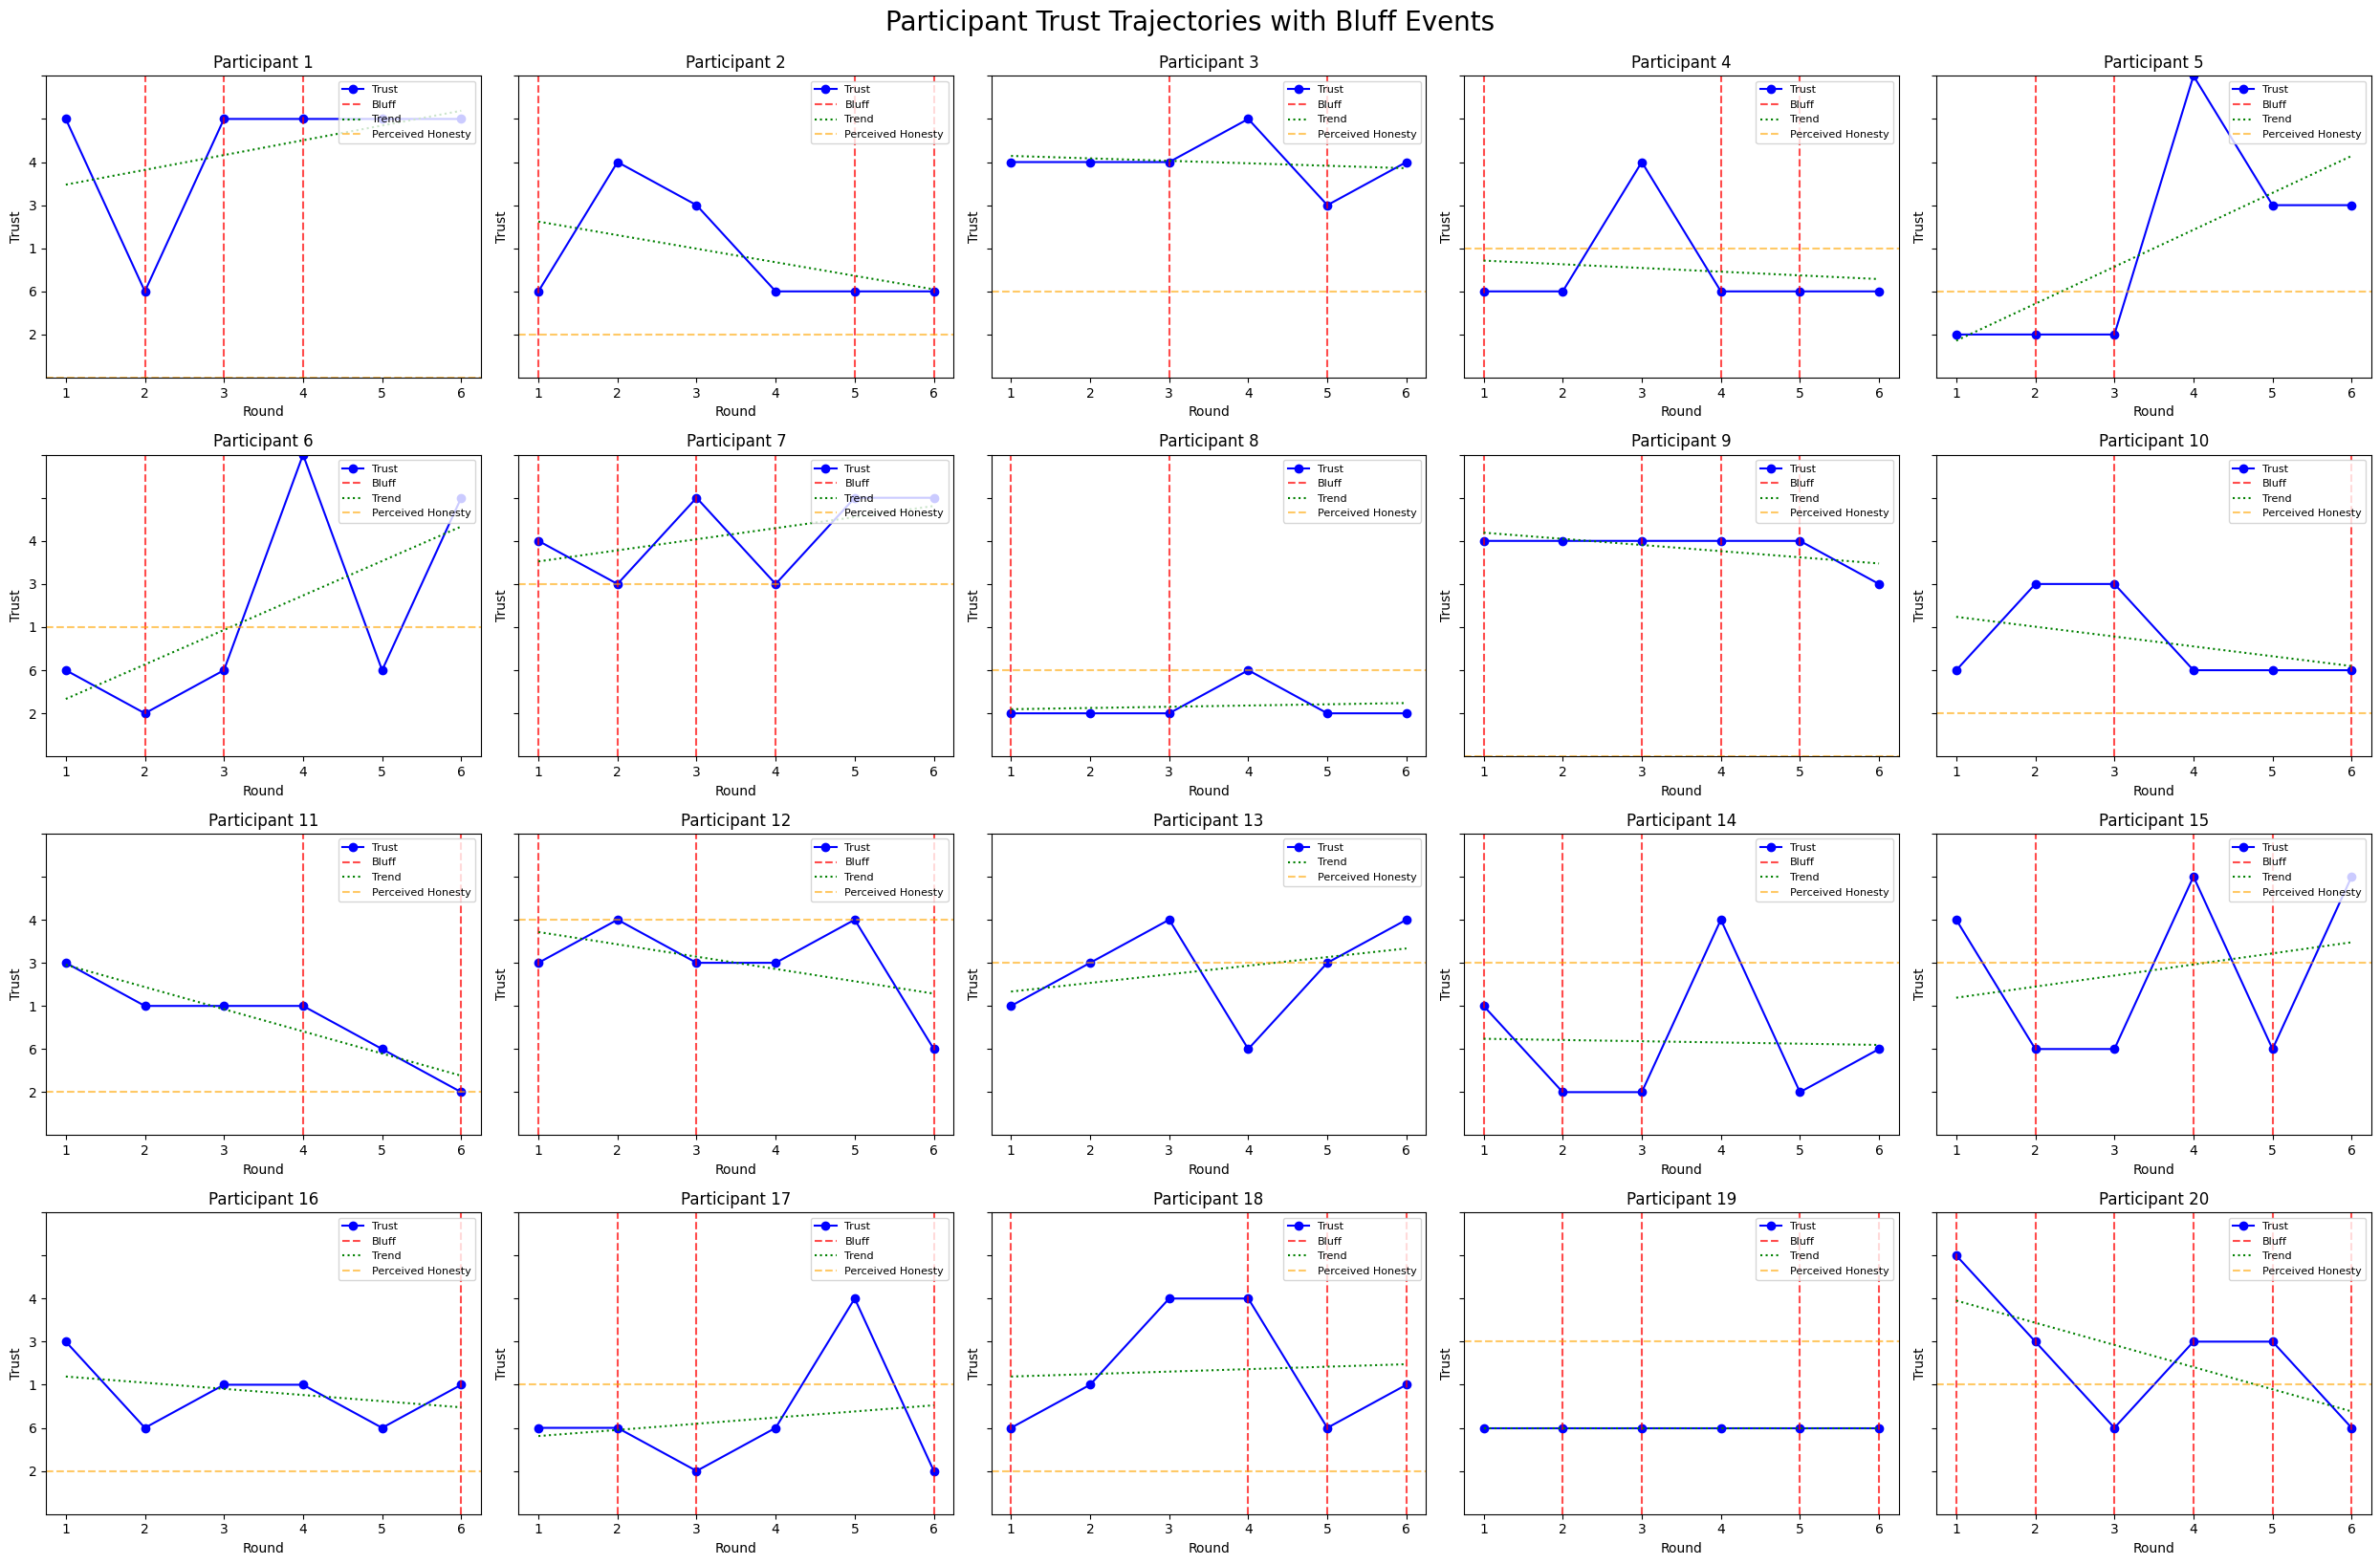

In [ ]:
# ---- Plot setup ----
n = len(participant_ids)
cols = 5
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(nrows=rows, sharey=True, ncols=cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

rounds = list(range(1, 7))

for idx, pid in enumerate(participant_ids):
    ax = axes[idx]
    row = df_trust[df_trust["Participant_ID"] == pid].iloc[0]
    trust_scores = pd.to_numeric([row.get(f"trust_round_{i}") for i in rounds], errors='coerce')

    # Plot trust scores
    ax.plot(rounds, trust_scores, marker='o', label="Trust", color="blue")

    # Bluff round vertical lines
    seen_bluff = False
    for bluff_r in bluff_map.get(pid, []):
        if bluff_r in rounds:
            ax.axvline(x=bluff_r, color="red", linestyle="--", alpha=0.7,
                       label="Bluff" if not seen_bluff else "")
            seen_bluff = True

    # Add trend line
    valid = [(r, t) for r, t in zip(rounds, trust_scores) if pd.notna(t)]
    if len(valid) >= 2:
        x_vals, y_vals = zip(*valid)
        y_vals = pd.to_numeric(y_vals, errors="coerce")
        slope, intercept = linregress(x_vals, y_vals)[:2]
        trend_line = [slope * x + intercept for x in rounds]
        ax.plot(rounds, trend_line, linestyle=":", color="green", label="Trend")

    # Perceived honesty baseline
    baseline = df_all.loc[df_all["Participant_ID"] == pid, "perceived_robot_honesty"].values[0]
    if pd.notna(baseline):
        ax.axhline(y=baseline, color="orange", linestyle="--", label="Perceived Honesty", alpha=0.6)

    # Set consistent axis and titles
    ax.set_title(f"Participant {pid}")
    ax.set_ylim(0, 7)
    ax.set_yticks(range(1, 8))
    ax.set_xticks(rounds)
    ax.set_xlabel("Round")
    ax.set_ylabel("Trust")
    ax.legend(loc="upper right", fontsize=8)

# Remove extra subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Participant Trust Trajectories with Bluff Events", fontsize=20, y=1.02)
plt.show()


## Robot Social Qualities

### RQ3: How do participants interpret the robot’s social traits, emotional impact, and moral significance during gameplay?


<ipython-input-68-09bee28c5daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trait_summary.index, y=trait_summary["Mean"], palette="coolwarm")


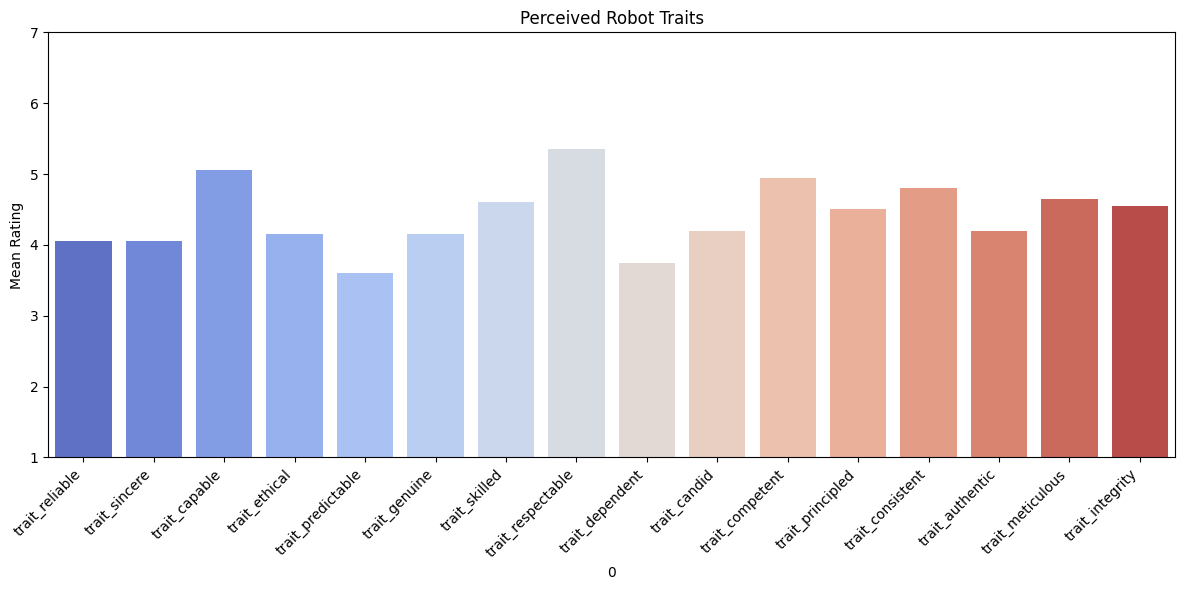

                   Mean  Std Dev  Min  Max
0                                         
trait_reliable     4.05     1.96  1.0  7.0
trait_sincere      4.05     1.67  1.0  7.0
trait_capable      5.05     1.19  2.0  7.0
trait_ethical      4.15     1.87  1.0  7.0
trait_predictable  3.60     1.76  1.0  6.0
trait_genuine      4.15     1.63  1.0  7.0
trait_skilled      4.60     1.64  1.0  7.0
trait_respectable  5.35     1.42  2.0  7.0
trait_dependent    3.75     1.48  2.0  6.0
trait_candid       4.20     1.54  2.0  7.0
trait_competent    4.95     1.19  2.0  7.0
trait_principled   4.50     1.36  2.0  7.0
trait_consistent   4.80     1.58  1.0  6.0
trait_authentic    4.20     1.36  2.0  6.0
trait_meticulous   4.65     1.35  2.0  6.0
trait_integrity    4.55     1.36  2.0  7.0


In [ ]:

trait_columns = [
    "trait_reliable", "trait_sincere", "trait_capable", "trait_ethical", "trait_predictable",
    "trait_genuine", "trait_skilled", "trait_respectable", "trait_dependent", "trait_candid",
    "trait_competent", "trait_principled", "trait_consistent", "trait_authentic",
    "trait_meticulous", "trait_integrity"
]

# Subset the DataFrame
traits_df = df_all[trait_columns].apply(pd.to_numeric, errors='coerce')

# Descriptive stats (mean, std, min, max)
trait_summary = traits_df.describe().T[["mean", "std", "min", "max"]]
trait_summary = trait_summary.rename(columns={
    "mean": "Mean",
    "std": "Std Dev",
    "min": "Min",
    "max": "Max"
})

# Round for cleaner presentation
trait_summary = trait_summary.round(2)

# ---- Step 5: Plot average ratings as a bar chart ----
plt.figure(figsize=(12, 6))
sns.barplot(x=trait_summary.index, y=trait_summary["Mean"], palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Rating")
plt.ylim(1, 7)
plt.title("Perceived Robot Traits")
plt.tight_layout()
plt.show()

# ---- Optional: print summary table ----
print(trait_summary)

### Inter-coder Reliability

In [79]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load coder annotations
coder1 = pd.read_csv("coder1.csv")
coder2 = pd.read_csv("coder2.csv")

# Merge on participant ID
merged = pd.merge(coder1, coder2, on="participant_id", suffixes=("_1", "_2"))

# Define the coding dimensions
dimensions = ["strategy", "anthropomorphism", "emotion", "morality", "alignment"]

# Compute kappa for each category
print("Cohen's Kappa for each coding dimension:\n")
kappa_scores = {}
for dim in dimensions:
    kappa = cohen_kappa_score(merged[f"{dim}_1"], merged[f"{dim}_2"])
    kappa_scores[dim] = kappa
    print(f"{dim.capitalize():<20}: {kappa:.2f}")

# Compute average Kappa
average_kappa = sum(kappa_scores.values()) / len(kappa_scores)
print(f"\nAverage Kappa: {average_kappa:.2f}")


Cohen's Kappa for each coding dimension:

Strategy            : 0.80
Anthropomorphism    : 0.63
Emotion             : 0.83
Morality            : 0.75
Alignment           : 0.68

Average Kappa: 0.74
